<a href="https://colab.research.google.com/github/SunZhi-Will/AI_Image/blob/main/AI_%E5%9C%96%E7%89%87%E7%94%9F%E6%88%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install diffusers
!pip install huggingface_hub
!pip install safetensors

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file

base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = "sdxl_lightning_2step_unet.safetensors" # Use the correct ckpt for your step setting!

In [ ]:
# Load model. (CPU)
# unet = UNet2DConditionModel.from_config(base, subfolder="unet")
# unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cpu"))
# pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float32, variant="fp16")

# Load model. (GPU)
unet = UNet2DConditionModel.from_config(base, subfolder="unet").to("cuda", torch.float16)
unet.load_state_dict(load_file(hf_hub_download(repo, ckpt), device="cuda"))
pipe = StableDiffusionXLPipeline.from_pretrained(base, unet=unet, torch_dtype=torch.float16, variant="fp16").to("cuda")

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:244: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all o

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Ensure sampler uses "trailing" timesteps.
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config, timestep_spacing="trailing")

# Ensure using the same inference steps as the loaded model and CFG set to 0.
pipe("* Body shape: similar to a fox * Body size: medium * Fur: twinkling with starlight, night blue* Ears: long and pointed, with a shiny tri-rhombus shape at the top* Tail: fluffy like tassels, with starlight particles at the end* Starlight particles on the tail: will change color according to emotions, such as showing dazzling blue light when excited", num_inference_steps=8, guidance_scale=0).images[0].save("output.png")

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['blue light when excited']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['blue light when excited']


  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
!pip install gradio_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00




---
# 直接戳API

Loaded as API: https://radames-real-time-text-to-image-sdxl-lightning.hf.space ✔
/tmp/gradio/b541291ff8b2a2b393ca3cd27dc8538e102f1353/tmpeaoc19rj.jpg


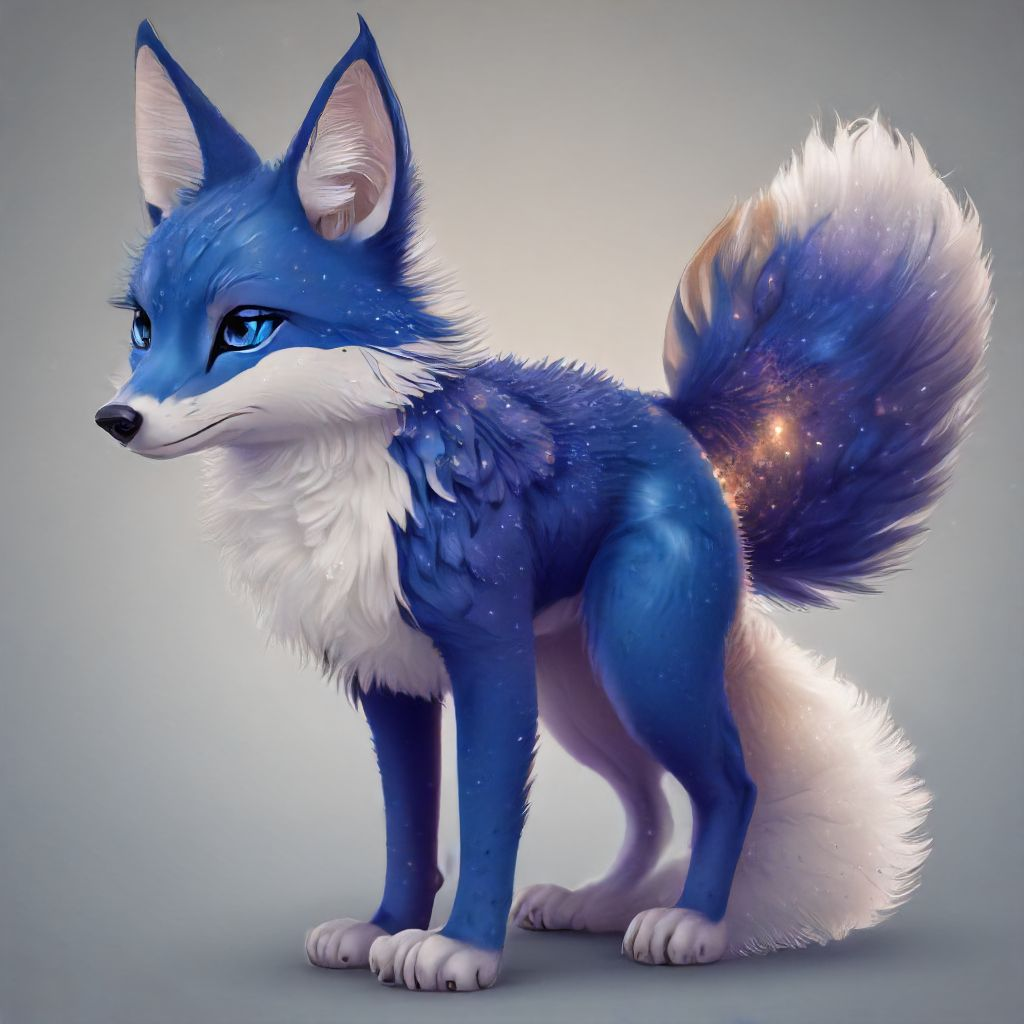

In [ ]:
from gradio_client import Client

client = Client("radames/Real-Time-Text-to-Image-SDXL-Lightning")
result = client.predict(
		"* Body shape: similar to a fox * Body size: medium * Fur: twinkling with starlight, night blue* Ears: long and pointed, with a shiny tri-rhombus shape at the top* Tail: fluffy like tassels, with starlight particles at the end* Starlight particles on the tail: will change color according to emotions, such as showing dazzling blue light when excited",	# str  in 'parameter_5' Textbox component
		0,	# float (numeric value between 0 and 12013012031030) in 'Seed' Slider component
		api_name="/predict"
)
print(result)

import io
import requests
from PIL import Image
from IPython.display import display

response = requests.get(client.src + "/file=" + result)
image_bytes = io.BytesIO(response.content)
img = Image.open(image_bytes)
display(img)